In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('spotify.csv')

In [3]:
df.shape

(440, 5)

In [4]:
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [6]:
df.isnull().sum()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [7]:
df.describe()

,Popularity,Duration (ms)
count,440.000000,440.000000
mean,75.736364,206810.040909
std,9.886534,53576.930289
min,29.000000,81666.000000
25%,70.000000,172778.500000
50%,77.000000,201866.000000
75%,83.000000,235119.750000
max,97.000000,501648.000000


In [10]:
df=df.drop_duplicates()

In [12]:
df.shape

(413, 5)

1.Load the dataframe and ensure data quality by checking for missing values and duplicate rows.
 Handle missing values and remove duplicate rows if necessary #done

2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

C:\Users\madhu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Popularity', ylabel='Count'>

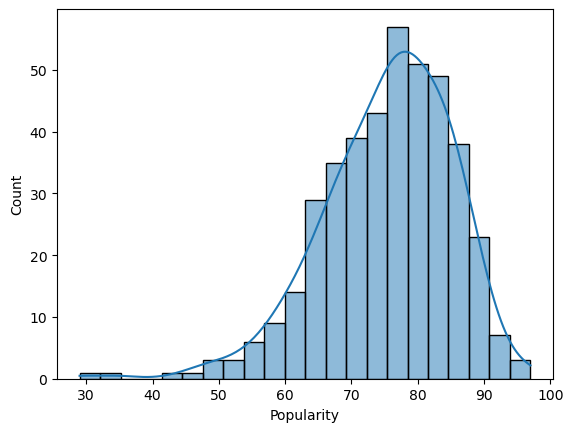

In [13]:
sns.histplot(data=df,x=df['Popularity'],kde=True) #left skewed,

3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.


<Axes: xlabel='Duration (ms)', ylabel='Popularity'>

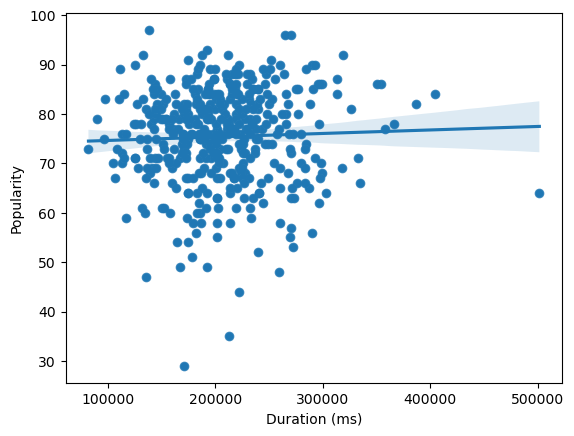

In [19]:
sns.scatterplot(data=df,y=df['Popularity'],x=df['Duration (ms)'])
sns.regplot(data=df,y=df['Popularity'],x=df['Duration (ms)'])

4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist
using a countplot

In [29]:
count_by_artist=df.groupby('Artist')['Track Name'].count()

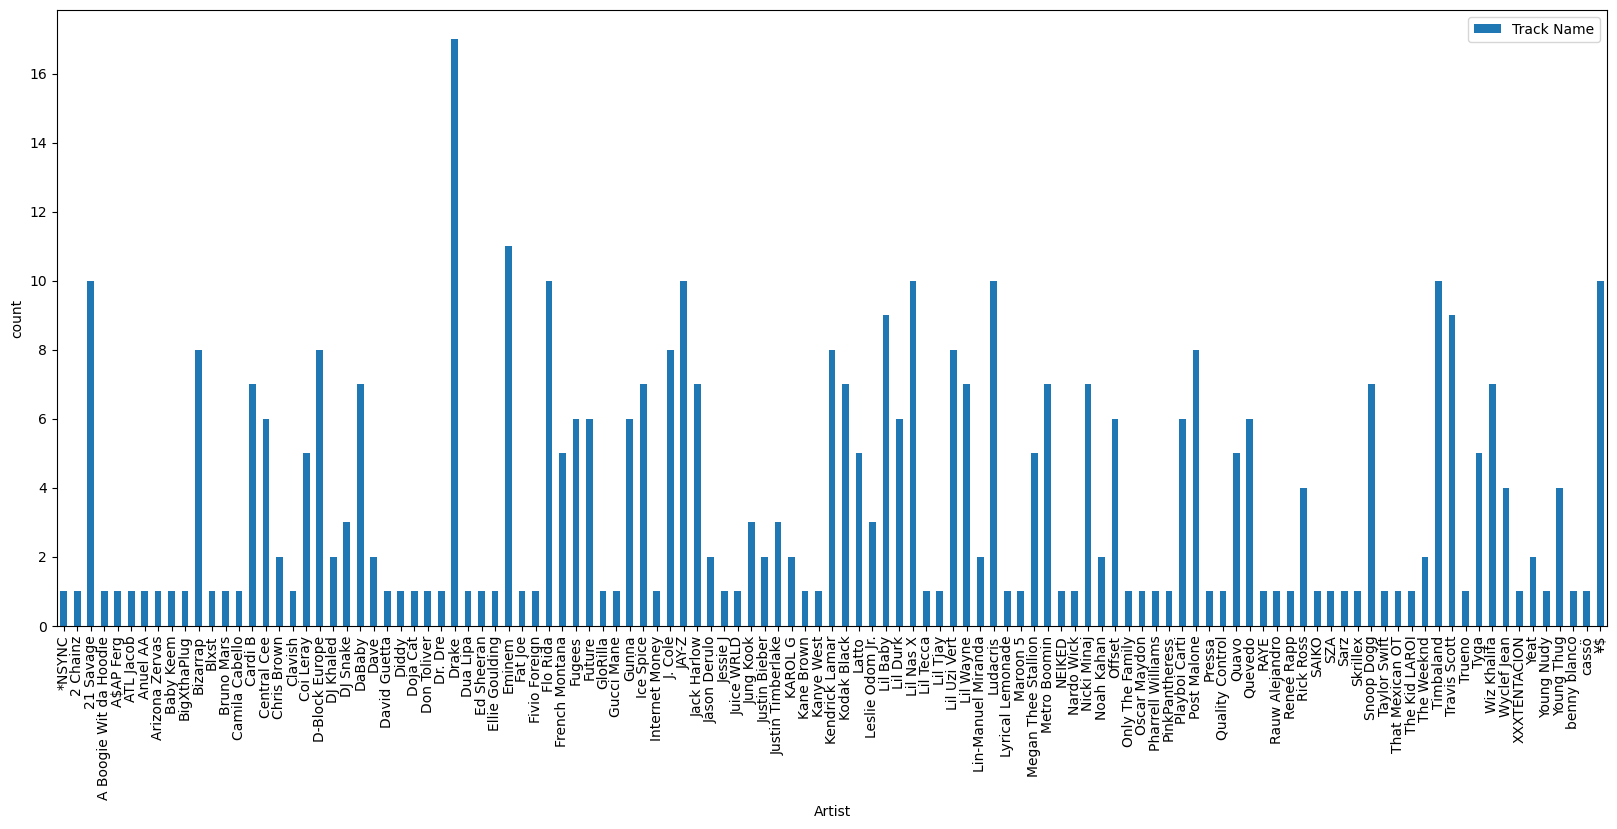

In [33]:
plt.figure(figsize=(20,8))
count_by_artist.plot(kind='bar')
plt.xlabel('Artist')
plt.ylabel('count')
plt.legend()
plt.show()

5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

In [40]:
count_by_popularity=df.groupby('Artist')['Popularity'].sum()

In [43]:
bottom_5_artists=count_by_popularity.sort_values(ascending=False).tail(5)

In [44]:
bottom_5_tracks = df[df['Artist'].isin(bottom_5_artists.index)][['Artist', 'Track Name']]

In [45]:
bottom_5_tracks

,Artist,Track Name
207,Pressa,Attachments (feat. Coi Leray)
208,Fivio Foreign,What’s My Name (with Queen Naija & Coi Leray)
209,RAYE,Flip A Switch. (feat. Coi Leray) - Remix
214,Arizona Zervas,ROXANNE - Remix
254,That Mexican OT,Point Em Out (with DaBaby)


6.Among the top 5 most popular artists, which artist has the highest popularity on average?
 Calculate and display the average popularity for each artist.


In [48]:
count_by_Popularity=df.groupby('Artist')['Popularity'].mean()

In [49]:
count_by_Popularity.sort_values(ascending=False).head(5)

Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64

7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [50]:
count_by_pop=df.groupby('Artist')['Popularity'].sum()

In [52]:
top_artist=count_by_pop.sort_values(ascending=False).head(5)

In [63]:
top_artist

Artist
Drake        1409
Eminem        920
¥$            851
21 Savage     838
Flo Rida      780
Name: Popularity, dtype: int64

In [65]:
top_tracks=df[df['Artist'].isin(top_artist.index)][['Artist','Track Name','Popularity']]

In [66]:
most_popular_tracks = top_tracks.loc[top_tracks.groupby('Artist')['Popularity'].idxmax()][['Artist', 'Track Name', 'Popularity']]


In [67]:
most_popular_tracks

,Artist,Track Name,Popularity
70,21 Savage,redrum,96
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92
80,Eminem,Without Me,90
300,Flo Rida,Low (feat. T-Pain),84
260,¥$,CARNIVAL,96


8.Visualize relationships between multiple numerical variables simultaneously using a pair plot

C:\Users\madhu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\madhu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


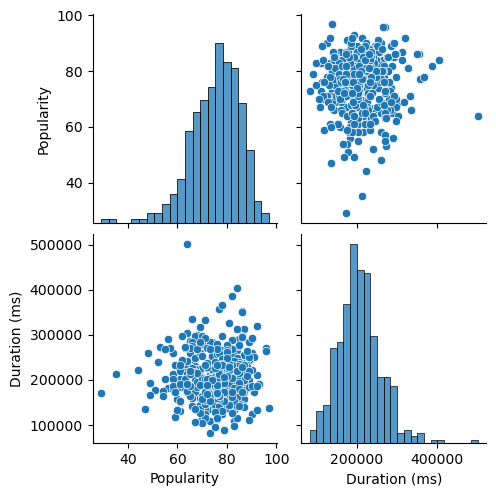

In [68]:
sns.pairplot(df)

Does the duration of tracks vary significantly across different artists?
Explore this visually using a box plot or violin plot.

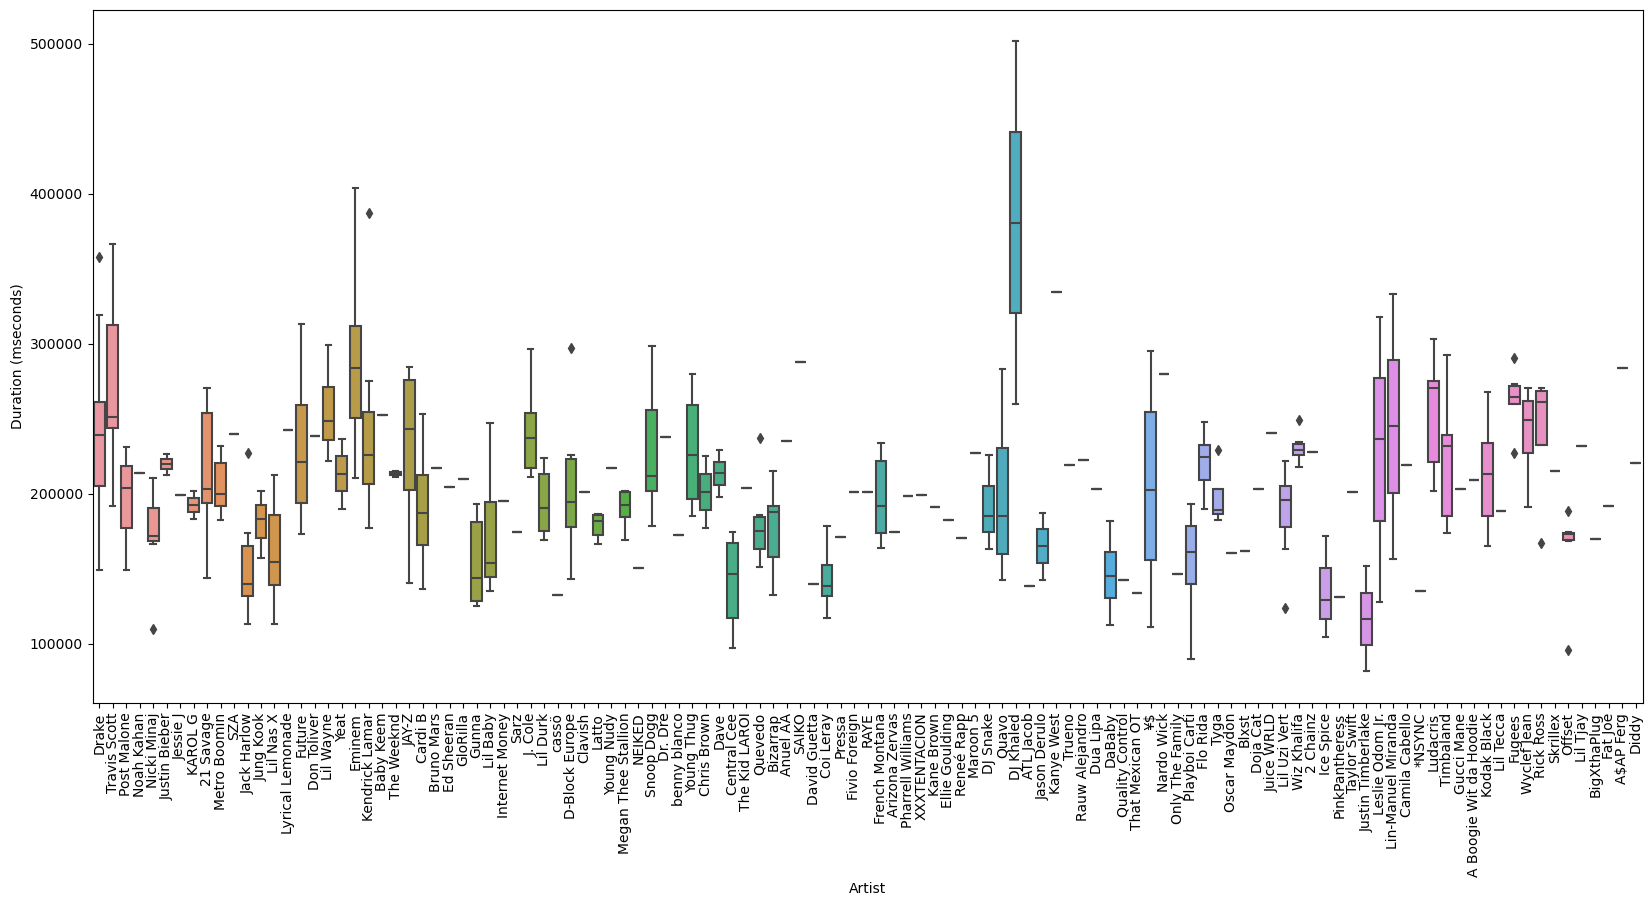

In [76]:
plt.figure(figsize=(20,9))
sns.boxplot(x=df['Artist'],y=df['Duration (ms)'],data=df)
plt.xlabel('Artist')
plt.ylabel('Duration (mseconds)')
plt.xticks(rotation=90)  # Rotate the artist names for better readability
plt.show()

10.How does the distribution of track popularity vary for different artists?
Visualize this using a swarm plot or a violin plot

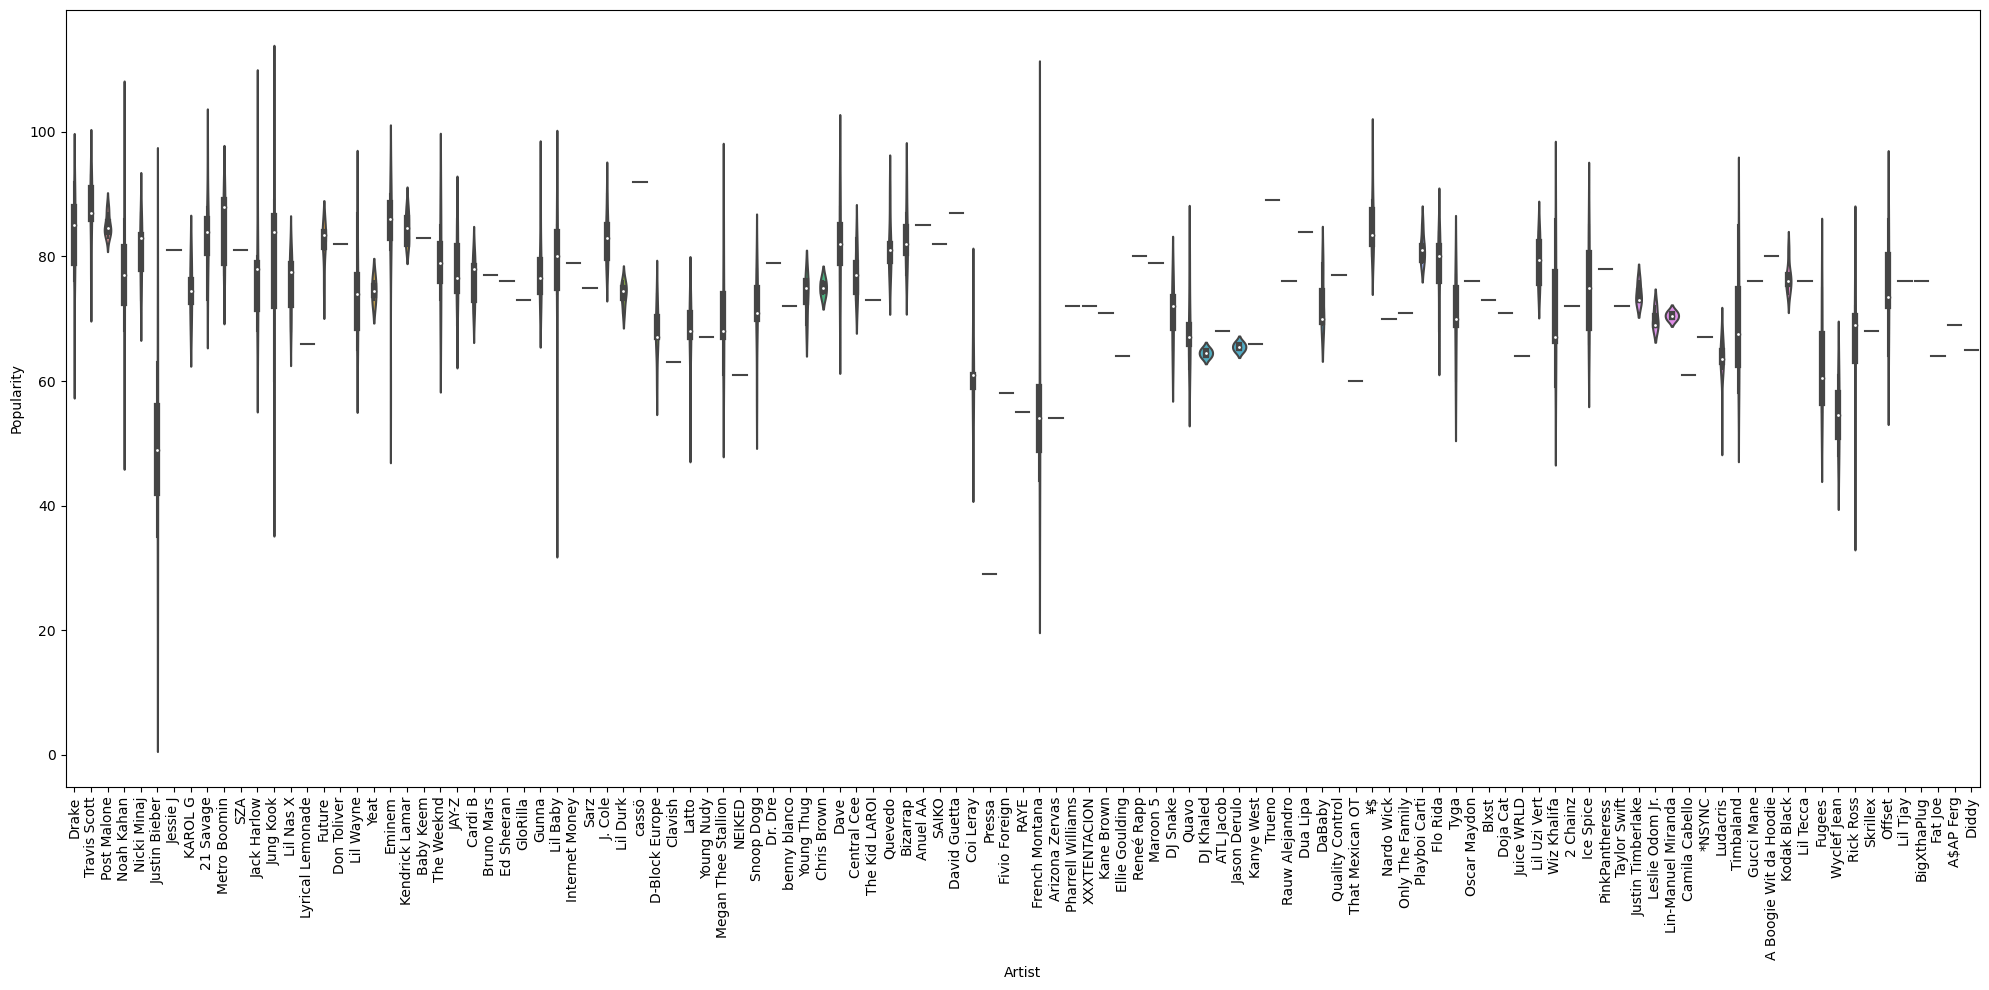

In [82]:
plt.figure(figsize=(20,10))
sns.violinplot(data=df,x='Artist',y='Popularity')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=90) # Rotate the artist names for better readability
plt.tight_layout()
plt.show()